# Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn
import psycopg2 as psy

from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import psycopg2

#### Step 2: Examine your data 

In [2]:
# Read in all three datasets using pandas
cancellations = pd.read_csv('/Users/scgiller/DSI-Projects/week7/Project 7/Data/airport_cancellations.csv')
operations = pd.read_csv('/Users/scgiller/DSI-Projects/week7/Project 7/Data/Airport_operations.csv')
airports = pd.read_csv('/Users/scgiller/DSI-Projects/week7/Project 7/Data/airports.csv')

Do cursory checks on each dataset. Check to see: where there might be missing values, what the primary key might be in order to merge the data, whether any of the data has incorrect type or format that needs to be cleaned

In [3]:
cancellations.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [4]:
cancellations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 6 columns):
Airport                    805 non-null object
Year                       805 non-null float64
Departure Cancellations    805 non-null float64
Arrival Cancellations      805 non-null float64
Departure Diversions       805 non-null float64
Arrival Diversions         805 non-null float64
dtypes: float64(5), object(1)
memory usage: 37.8+ KB


In [5]:
cancellations.describe()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
count,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2008.986335,1292.038509,1333.124224,173.315528,169.413665
std,3.158116,1835.961943,1975.224868,172.345539,228.521615
min,2004.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,349.000000,314.000000,62.000000,41.000000
50%,2009.000000,663.000000,642.000000,110.000000,84.000000
75%,2012.000000,1472.000000,1523.000000,236.000000,190.000000
max,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000


In [6]:
operations.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [7]:
operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 15 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures for metric computation     841 non-null int64
arrivals for metric computation       841 non-null int64
percent on-time gate departures       841 non-null float64
percent on-time airport departures    841 non-null float64
percent on-time gate arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average taxi out delay                841 non-null float64
average airport departure delay       841 non-null float64
average airborne delay                841 non-null float64
average taxi in delay                 841 non-null float64
average block delay                   841 non-null float64
average gate arrival delay            841 non-null float64
dtypes: float64(1

In [8]:
operations.describe()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,2009.028537,108257.063020,107815.561237,0.764119,0.714283,0.754281,13.561403,13.703389,3.519750,16.249964,2.921237,1.348894,3.330773,14.013222
std,3.156497,98278.401526,97916.908601,0.093361,0.101271,0.082302,4.746563,3.792181,2.391278,5.353012,1.201453,0.882252,1.026872,4.482215
min,2004.000000,261.000000,259.000000,0.246700,0.245700,0.324100,5.350000,7.040000,0.000000,6.290000,0.950000,0.000000,1.230000,6.330000
25%,2006.000000,37653.000000,37502.000000,0.745700,0.684800,0.737500,10.910000,11.260000,2.210000,12.950000,2.050000,0.800000,2.630000,11.300000
50%,2009.000000,72043.000000,71254.000000,0.782500,0.737200,0.768300,12.640000,12.810000,2.990000,15.220000,2.650000,1.080000,3.160000,13.080000
75%,2012.000000,162913.000000,160775.000000,0.809800,0.772200,0.796500,14.950000,15.650000,4.080000,17.940000,3.620000,1.740000,3.860000,15.250000
max,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,40.800000,35.760000,18.940000,40.870000,7.820000,6.180000,7.520000,34.880000


In [9]:
airports.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


In [10]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 13 columns):
Key                        5164 non-null float64
LocID                      5152 non-null object
AP_NAME                    5164 non-null object
ALIAS                      3498 non-null object
Facility Type              5164 non-null object
FAA REGION                 5164 non-null object
COUNTY                     5164 non-null object
CITY                       5164 non-null object
STATE                      5164 non-null object
AP Type                    5164 non-null object
Latitude                   5164 non-null float64
Longitude                  5164 non-null float64
Boundary Data Available    5164 non-null object
dtypes: float64(3), object(10)
memory usage: 524.8+ KB


In [11]:
# LocID appears to be the field that will match up with the airport code field in the first two datasets, let's take a
# look and figure out if this might be a problem
airports['missing_locid'] = np.where(pd.isnull(airports['LocID']), 1, 0)
airports_missing = airports.loc[airports['missing_locid'] == 1]
airports_missing.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,missing_locid
182,5238.0,NaN,TERLINGUA RANCH,NaN,Airport,ASW,BREWSTER,ALPINE,TX,Public Use,29.451500,-103.397611,No,1
1208,4838.0,NaN,MORIARTY,NaN,Airport,ASW,TORRANCE,MORIARTY,NM,Public Use,34.982278,-106.005028,No,1
1232,5139.0,NaN,BUFFALO,NaN,Airport,ASW,RANDALL,AMARILLO,TX,Public Use,35.063889,-101.877583,No,1
1233,5197.0,NaN,MAPLES FIELD,NaN,Airport,ASW,RANDALL,CANYON,TX,Public Use,35.064000,-101.954611,No,1
1408,5199.0,NaN,MIAMI-ROBERTS COUNTY,NaN,Airport,ASW,ROBERTS,MIAMI,TX,Public Use,35.713932,-100.603192,No,1


### Intro: Write a problem statement / aim for this project

Using principal component analysis and k-means clustering, determine the most important factors contributing to departure delays.

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [12]:
engine = create_engine('postgresql://localhost:5432/airports')

Load our csv files into tables

In [13]:
cancellations.to_sql('cancellations', engine, if_exists='replace')
operations.to_sql('operations', engine, if_exists='replace')
airports.to_sql('airports', engine, if_exists='replace')

Join airport_cancellations.csv and airports.csv into one table

In [14]:
%load_ext sql

//anaconda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
//anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [15]:
%%sql postgresql://localhost:5432/airports

select * from cancellations limit 2;

2 rows affected.


index,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0


In [16]:
%%sql 
select * from airports limit 2;

2 rows affected.


index,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,missing_locid
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes,0
1,5088.0,X64,PATILLAS,None,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.01933,No,0


In [17]:
%%sql 
select * from cancellations limit 2;

2 rows affected.


index,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0


In [18]:
%%sql

select * from cancellations as a
JOIN airports as b
ON a."Airport" = b."LocID";

805 rows affected.


index,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,index_1,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,missing_locid
0,ABQ,2004.0,242.0,235.0,71.0,46.0,1223,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,0
1,ABQ,2005.0,221.0,190.0,61.0,33.0,1223,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,0
2,ABQ,2006.0,392.0,329.0,71.0,124.0,1223,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,0
3,ABQ,2007.0,366.0,304.0,107.0,45.0,1223,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,0
4,ABQ,2008.0,333.0,300.0,79.0,42.0,1223,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,0
5,ABQ,2009.0,192.0,162.0,74.0,26.0,1223,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,0
6,ABQ,2010.0,222.0,177.0,71.0,50.0,1223,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,0
7,ABQ,2011.0,345.0,294.0,77.0,61.0,1223,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,0
8,ABQ,2012.0,237.0,181.0,65.0,60.0,1223,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,0
9,ABQ,2013.0,232.0,212.0,62.0,46.0,1223,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,0


Query the database for our intial data

In [19]:

%%sql

select * from operations
limit 5;

5 rows affected.


index,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.814,0.7922,0.8001,9.6,9.79,2.29,11.2,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.4,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


#### 1.2 What are the risks and assumptions of our data? 

The Operations file and the Cancellations file, while both at the Airport/Year level, do not completely match up. Some Airport/Year combinations appear in the Operations file but the corresponding Airport/Year does not appear in the Cancellations file.

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [20]:
# Merge cancellations and operations data using the Airport and Year fields
master = pd.merge(cancellations, operations, left_on=['Airport','Year'], right_on=['airport','year'], how='outer')

In [21]:
# There are some records in the operations data that do not appear in the cancellations data, we will drop these 
# records
master = master[master['airport'].isnull() != True]

In [22]:
# There are some records in the cancellations data that do not appear in the operations data, we will drop these 
# records as well
master = master[master['Airport'].isnull() != True]

We could have just used an "inner" merge above, but I wanted to make sure I saw all the data to understand what I would be dropping

In [23]:
# Merge on the airports data onto the combined set of operations and cancellation data
master_v2 = pd.merge(master, airports, left_on='airport', right_on='LocID', how='left')

In [24]:
master_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 798
Data columns (total 35 columns):
Airport                               799 non-null object
Year                                  799 non-null float64
Departure Cancellations               799 non-null float64
Arrival Cancellations                 799 non-null float64
Departure Diversions                  799 non-null float64
Arrival Diversions                    799 non-null float64
airport                               799 non-null object
year                                  799 non-null float64
departures for metric computation     799 non-null float64
arrivals for metric computation       799 non-null float64
percent on-time gate departures       799 non-null float64
percent on-time airport departures    799 non-null float64
percent on-time gate arrivals         799 non-null float64
average_gate_departure_delay          799 non-null float64
average_taxi_out_time                 799 non-null float64
average taxi

In [25]:
# Remove fields that are duplicates or will not be used for analysis
del master_v2['Airport']
del master_v2['Year']
del master_v2['Key']
del master_v2['LocID']
del master_v2['AP_NAME']
del master_v2['ALIAS']
del master_v2['Facility Type']
del master_v2['Boundary Data Available']
del master_v2['missing_locid']
del master_v2['Latitude']
del master_v2['Longitude']

In [26]:
# Create dataset of only arrival data to inspect potential correlation
arrivals = master_v2[[u'airport', u'arrivals for metric computation', u'percent on-time gate arrivals',
          u'average airborne delay', u'average taxi in delay',
          u'average block delay', u'average gate arrival delay', u'Arrival Cancellations', u'Arrival Diversions']]

In [27]:
# Create dataset of only departure data to inspect potential correlation
departures = master_v2[[u'airport', u'departures for metric computation', u'percent on-time gate departures',
         u'percent on-time airport departures', u'average_taxi_out_time',
         u'average taxi out delay', u'average airport departure delay',
         u'Departure Cancellations',u'Departure Diversions']]

Create two pivot tables: one by year and one by airport. Then do some visualization.

In [28]:
airport_totals = pd.pivot_table(master_v2, index=['airport'], values=['Departure Cancellations','Arrival Cancellations',
                                                                     'Departure Diversions','Arrival Diversions',
                                                                     'departures for metric computation',
                                                                     'arrivals for metric computation',
                                                                      'average airport departure delay',
                                                                     'average_taxi_out_time'],
               aggfunc=[np.sum])

airport_totals.columns = airport_totals.columns.droplevel()
airport_totals.reset_index(inplace=True)

In [29]:
airport_totals.head()

,airport,Arrival Cancellations,Arrival Diversions,Departure Cancellations,Departure Diversions,arrivals for metric computation,average airport departure delay,average_taxi_out_time,departures for metric computation
0,ABQ,2658.0,570.0,3097.0,804.0,494420.0,137.88,112.33,493135.0
1,ANC,3750.0,474.0,3053.0,897.0,695073.0,176.07,135.49,743903.0
2,ATL,80490.0,9594.0,72186.0,9729.0,5122886.0,220.76,217.45,5159044.0
3,AUS,4738.0,770.0,5217.0,903.0,587668.0,147.89,127.18,588016.0
4,BDL,5009.0,409.0,5603.0,732.0,500302.0,154.13,143.58,504934.0


In [30]:
airport_totals.sort('average_taxi_out_time', ascending=False).head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,airport,Arrival Cancellations,Arrival Diversions,Departure Cancellations,Departure Diversions,arrivals for metric computation,average airport departure delay,average_taxi_out_time,departures for metric computation
30,JFK,27171.0,4401.0,27352.0,3014.0,2085879.0,301.74,314.74,2102854.0
33,LGA,50157.0,5691.0,50663.0,2796.0,2045739.0,283.53,272.35,2043854.0
20,EWR,47906.0,5285.0,46661.0,3582.0,2201788.0,306.54,269.33,2218791.0
52,PHL,21546.0,3076.0,21944.0,2449.0,2445557.0,255.02,221.14,2449424.0
2,ATL,80490.0,9594.0,72186.0,9729.0,5122886.0,220.76,217.45,5159044.0


In [31]:
airport_totals.sort('average airport departure delay', ascending=False).head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,airport,Arrival Cancellations,Arrival Diversions,Departure Cancellations,Departure Diversions,arrivals for metric computation,average airport departure delay,average_taxi_out_time,departures for metric computation
20,EWR,47906.0,5285.0,46661.0,3582.0,2201788.0,306.54,269.33,2218791.0
30,JFK,27171.0,4401.0,27352.0,3014.0,2085879.0,301.74,314.74,2102854.0
33,LGA,50157.0,5691.0,50663.0,2796.0,2045739.0,283.53,272.35,2043854.0
24,HPN,3129.0,837.0,3646.0,302.0,351165.0,270.24,151.97,347900.0
52,PHL,21546.0,3076.0,21944.0,2449.0,2445557.0,255.02,221.14,2449424.0


In [32]:
ewr = master_v2.loc[master_v2['airport'] == 'EWR']
ewr.iloc[:,:19]

,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
220,3883.0,3981.0,295.0,418.0,EWR,2004.0,212226.0,209575.0,0.7921,0.5698,0.7147,12.87,25.93,12.73,23.59,5.93,2.21,6.04,18.54
221,4622.0,4696.0,317.0,472.0,EWR,2005.0,211790.0,209551.0,0.7421,0.5255,0.6528,16.02,25.96,12.31,26.62,6.22,2.63,7.52,23.18
222,4557.0,4650.0,346.0,756.0,EWR,2006.0,214805.0,213118.0,0.7189,0.4525,0.6383,18.07,29.13,15.42,31.80,6.21,2.65,7.25,24.79
223,5926.0,5992.0,345.0,718.0,EWR,2007.0,209019.0,207435.0,0.6903,0.4335,0.6180,21.24,28.74,15.22,35.34,5.49,2.80,6.89,27.78
224,4511.0,4608.0,324.0,545.0,EWR,2008.0,207145.0,206270.0,0.7034,0.4371,0.6404,20.24,28.98,15.63,34.57,4.83,3.18,5.64,26.55
225,2969.0,3013.0,348.0,484.0,EWR,2009.0,196298.0,195150.0,0.7408,0.4957,0.6701,17.99,25.74,13.09,29.70,4.66,2.15,5.12,24.88
226,3706.0,3750.0,299.0,391.0,EWR,2010.0,192614.0,191370.0,0.7540,0.6100,0.7203,16.22,20.94,8.10,23.19,4.11,1.96,4.10,19.37
227,4502.0,4525.0,286.0,491.0,EWR,2011.0,192879.0,191645.0,0.7318,0.5873,0.6690,17.77,20.99,8.49,25.08,4.85,2.54,5.14,22.32
228,3821.0,3915.0,315.0,310.0,EWR,2012.0,196105.0,195110.0,0.7217,0.5716,0.7009,18.06,21.33,8.71,25.66,3.90,2.86,3.61,19.91
229,3350.0,3579.0,358.0,461.0,EWR,2013.0,196365.0,194358.0,0.7264,0.5815,0.7095,18.13,20.91,8.41,25.53,3.54,2.51,3.46,20.23


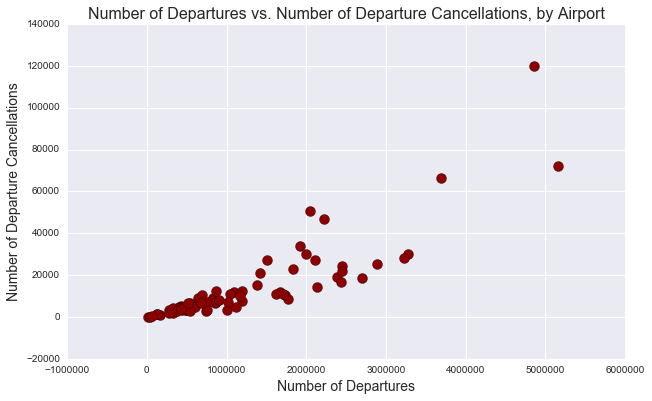

In [35]:
# scatter plot of number of cancellations vs flights
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(airport_totals['departures for metric computation'], airport_totals['Departure Cancellations'], 
             c='darkred', s=100)

axes.set_title('Number of Departures vs. Number of Departure Cancellations, by Airport', fontsize=16)
axes.set_xlabel('Number of Departures', fontsize=14)
axes.set_ylabel('Number of Departure Cancellations', fontsize=14)

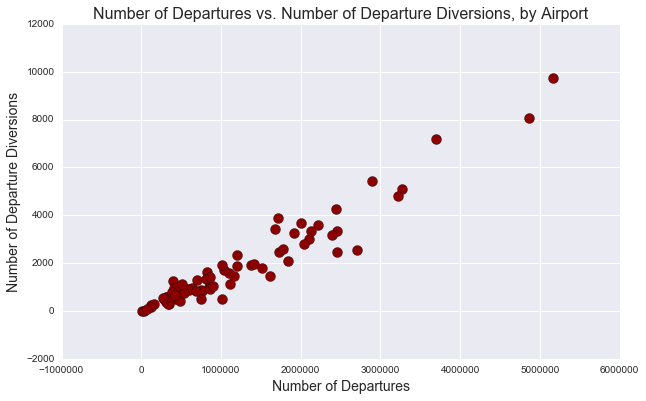

In [36]:
# scatter plot of number of diversions vs flights

fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(airport_totals['departures for metric computation'], airport_totals['Departure Diversions'], 
             c='darkred', s=100)

axes.set_title('Number of Departures vs. Number of Departure Diversions, by Airport', fontsize=16)
axes.set_xlabel('Number of Departures', fontsize=14)
axes.set_ylabel('Number of Departure Diversions', fontsize=14)

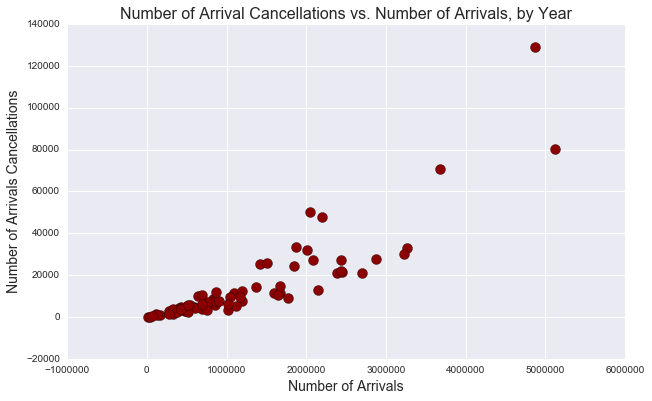

In [37]:
# scatter plot of number of cancellations vs flights

fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(airport_totals.iloc[:,5], airport_totals.iloc[:,1], 
             c='darkred', s=100)

axes.set_title('Number of Arrival Cancellations vs. Number of Arrivals, by Year', fontsize=16)
axes.set_xlabel('Number of Arrivals', fontsize=14)
axes.set_ylabel('Number of Arrivals Cancellations', fontsize=14)

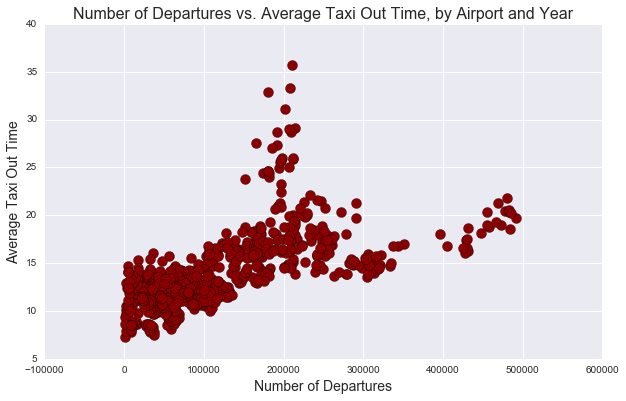

In [38]:
# scatter plot of taxi out time vs flights

fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(master_v2['departures for metric computation'], master_v2['average_taxi_out_time'], 
             c='darkred', s=100)

axes.set_title('Number of Departures vs. Average Taxi Out Time, by Airport and Year', fontsize=16)
axes.set_xlabel('Number of Departures', fontsize=14)
axes.set_ylabel('Average Taxi Out Time', fontsize=14)

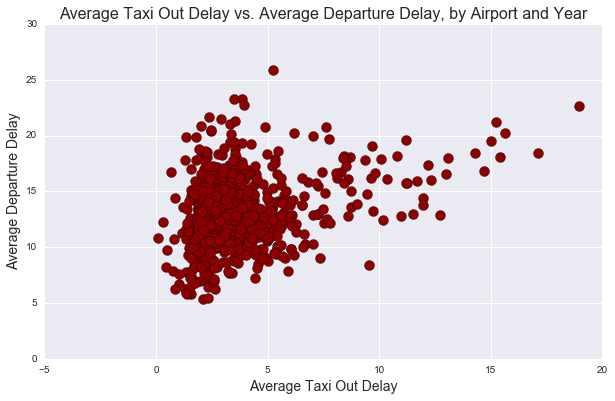

In [40]:
# scatter plot of number of diversions vs flights

fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(master_v2['average taxi out delay'], master_v2['average_gate_departure_delay'], 
             c='darkred', s=100)

axes.set_title('Average Taxi Out Delay vs. Average Departure Delay, by Airport and Year', fontsize=16)
axes.set_xlabel('Average Taxi Out Delay', fontsize=14)
axes.set_ylabel('Average Departure Delay', fontsize=14)

In [70]:
master_v2['ewr_flag'] = np.where(master_v2['airport']=='EWR', 1, 0)

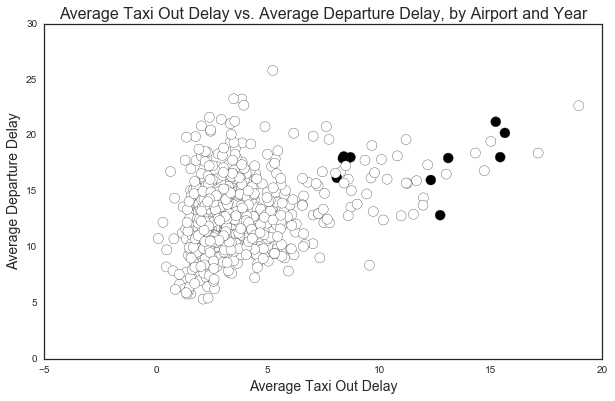

In [76]:
# scatter plot of number of diversions vs flights

fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(master_v2['average taxi out delay'], master_v2['average_gate_departure_delay'], 
             c=master_v2['ewr_flag'], s=100)

axes.set_title('Average Taxi Out Delay vs. Average Departure Delay, by Airport and Year', fontsize=16)
axes.set_xlabel('Average Taxi Out Delay', fontsize=14)
axes.set_ylabel('Average Departure Delay', fontsize=14)

In [41]:
year_totals = pd.pivot_table(master_v2, index=['year'], values=['Departure Cancellations','Arrival Cancellations',
                                                                     'Departure Diversions','Arrival Diversions',
                                                                     'departures for metric computation',
                                                                     'arrivals for metric computation'],
               aggfunc=[np.sum, np.mean])

year_totals.columns = year_totals.columns.droplevel()
year_totals.reset_index(inplace=True)

In [42]:
year_totals

,year,Arrival Cancellations,Arrival Diversions,Departure Cancellations,Departure Diversions,arrivals for metric computation,departures for metric computation,Arrival Cancellations,Arrival Diversions,Departure Cancellations,Departure Diversions,arrivals for metric computation,departures for metric computation
0,2004.0,105582.0,11423.0,102169.0,11408.0,8403068.0,8448021.0,1487.070423,160.887324,1439.000000,160.676056,118353.070423,118986.211268
1,2005.0,109796.0,11656.0,106594.0,11796.0,8994706.0,9046718.0,1546.422535,164.169014,1501.323944,166.140845,126686.000000,127418.563380
2,2006.0,99683.0,13903.0,96773.0,13451.0,8769358.0,8832600.0,1384.486111,193.097222,1344.069444,186.819444,121796.638889,122675.000000
3,2007.0,131836.0,14572.0,128206.0,14126.0,8937146.0,8958208.0,1781.567568,196.918919,1732.513514,190.891892,120772.243243,121056.864865
4,2008.0,114124.0,14493.0,110654.0,14548.0,8531547.0,8556044.0,1542.216216,195.851351,1495.324324,196.594595,115291.175676,115622.216216
5,2009.0,73857.0,12471.0,70752.0,13144.0,7888150.0,7919350.0,1011.739726,170.835616,969.205479,180.054795,108056.849315,108484.246575
6,2010.0,94325.0,12431.0,91099.0,13129.0,7867412.0,7900851.0,1292.123288,170.287671,1247.931507,179.849315,107772.767123,108230.835616
7,2011.0,96955.0,11778.0,94394.0,12484.0,7870747.0,7899518.0,1328.150685,161.342466,1293.068493,171.013699,107818.452055,108212.575342
8,2012.0,66180.0,10043.0,64120.0,10797.0,7740598.0,7762301.0,906.575342,137.575342,878.356164,147.904110,106035.589041,106332.890411
9,2013.0,77375.0,11496.0,74560.0,12023.0,7671298.0,7697539.0,1059.931507,157.479452,1021.369863,164.698630,105086.273973,105445.739726


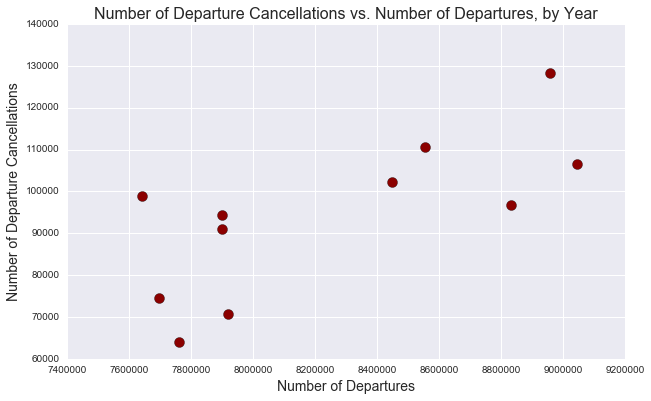

In [43]:
# scatter plot of number of cancellations vs flights

fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(year_totals.iloc[:,6], year_totals.iloc[:,3], 
             c='darkred', s=100)

axes.set_title('Number of Departure Cancellations vs. Number of Departures, by Year', fontsize=16)
axes.set_xlabel('Number of Departures', fontsize=14)
axes.set_ylabel('Number of Departure Cancellations', fontsize=14)

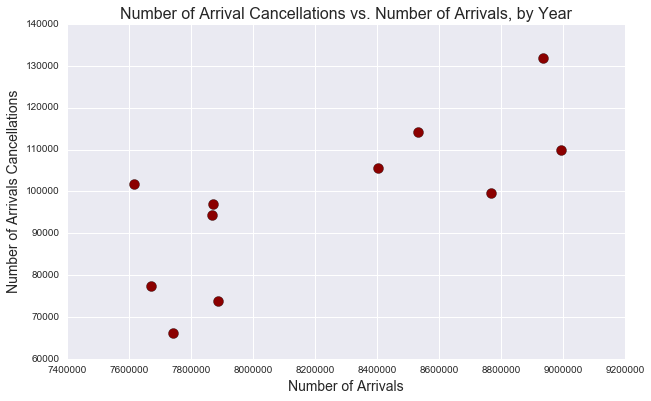

In [44]:
# scatter plot of number of cancellations vs flights

fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(year_totals.iloc[:,5], year_totals.iloc[:,1], 
             c='darkred', s=100)

axes.set_title('Number of Arrival Cancellations vs. Number of Arrivals, by Year', fontsize=16)
axes.set_xlabel('Number of Arrivals', fontsize=14)
axes.set_ylabel('Number of Arrivals Cancellations', fontsize=14)

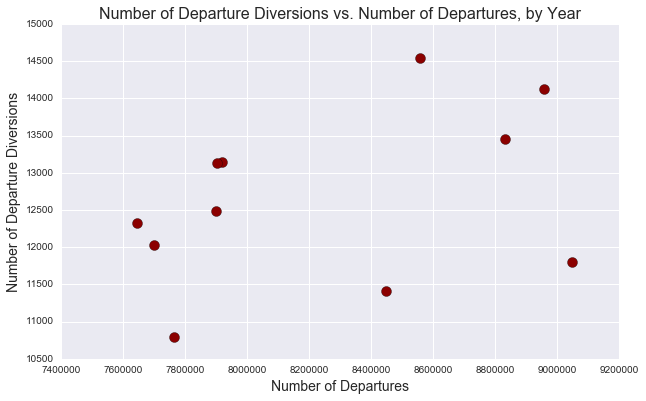

In [45]:
# scatter plot of number of diversions vs flights

fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(year_totals.iloc[:,6], year_totals.iloc[:,4], 
             c='darkred', s=100)

axes.set_title('Number of Departure Diversions vs. Number of Departures, by Year', fontsize=16)
axes.set_xlabel('Number of Departures', fontsize=14)
axes.set_ylabel('Number of Departure Diversions', fontsize=14)

#### Are there any unique values? 

The observations are on the airport-year level. The combination of airport code and year creates a unique identifier.

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

In [46]:
# Create dummies for Airport code, FAA Region, State, and AP Type
master_v2 = pd.concat([master_v2,pd.get_dummies(master_v2['airport'])], axis = 1)
master_v2 = pd.concat([master_v2,pd.get_dummies(master_v2['FAA REGION'])], axis = 1)
master_v2 = pd.concat([master_v2,pd.get_dummies(master_v2['STATE'])], axis = 1)
master_v2 = pd.concat([master_v2,pd.get_dummies(master_v2['AP Type'])], axis = 1)

#### 3.2 Format and Clean the Data

In [47]:
# Remove one dummy from each of the four sets of dummies above
del master_v2['ABQ']
del master_v2['ASW']
del master_v2['WI']
del master_v2['Public Use']

In [48]:
# Use scaling
from sklearn import preprocessing

X = master_v2[[u'percent on-time gate arrivals',
          u'average airborne delay', u'average taxi in delay',
          u'average block delay', u'average gate arrival delay', u'Arrival Cancellations', u'Arrival Diversions',
        u'percent on-time gate departures',
         u'percent on-time airport departures', u'average_taxi_out_time',
         u'average taxi out delay', u'average airport departure delay',
         u'Departure Cancellations',u'Departure Diversions']]

xStand = preprocessing.scale(master_v2[[u'percent on-time gate arrivals',
          u'average airborne delay', u'average taxi in delay',
          u'average block delay', u'average gate arrival delay', u'Arrival Cancellations', u'Arrival Diversions',
        u'percent on-time gate departures',
         u'percent on-time airport departures', u'average_taxi_out_time',
         u'average taxi out delay', u'average airport departure delay',
         u'Departure Cancellations',u'Departure Diversions']])

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

Looking at the pairplots below

#### 4.2 Find correlations in the data

In [ ]:
import seaborn as sns
%matplotlib inline

sns.pairplot(arrivals)

In [ ]:
sns.pairplot(departures)

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: Correlated predictor variables are combined into new independent variables, ensuring that predictors from PCA are independent.

#### 4.5 How can you improve your overall analysis? 

Answer: Use PCA to significantly limit the number of features

### Part 5: Perform a PCA

#### 5.1 Conduct the PCA

In [49]:
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics

covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [50]:
# Explained Variance
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [51]:
print(varExpl)

[54.692236361408085, 21.804471434147235, 7.9650830066418639, 4.4382792211222277, 3.6393344883570355, 2.6522968675517711, 1.4418148812127571, 1.2367404622497564, 0.9925432265818287, 0.61448127229909333, 0.39606195845154019, 0.080122184511710839, 0.034860514392445044, 0.011674121072656028]


In [52]:
# Cumulative Variance
cvarex = np.cumsum(varExpl)

In [53]:
print(cvarex)

[  54.69223636   76.4967078    84.4617908    88.90007002   92.53940451
   95.19170138   96.63351626   97.87025672   98.86279995   99.47728122
   99.87334318   99.95346536   99.98832588  100.        ]


84.46% of the behavior can be explained by the first three principal componants

In [54]:
# Split the data into THREE components
pcask = PCA(n_components=3)
print pcask.fit(xStand).components_ # See the eigenvectors
xPC = pcask.fit_transform(xStand) # Use the eigenvectors to transform xStand onto new axes

[[-0.18946488  0.22840168  0.2781265   0.25614815  0.25306253  0.27767853
   0.26270275 -0.19320774 -0.31098778  0.29733783  0.30802161  0.31897233
   0.280777    0.24678323]
 [-0.44299874  0.04712175 -0.25047637  0.11456515  0.34862284 -0.27223831
  -0.2923603  -0.37875559 -0.22513738 -0.08440699 -0.0635923   0.22171701
  -0.26067161 -0.34946053]
 [ 0.17374387  0.50266091 -0.0666432   0.22478283 -0.11307146 -0.25844918
  -0.20361056  0.36536699  0.03130798  0.41074423  0.37424943 -0.02525183
  -0.25208512 -0.1835941 ]]


In [55]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2','PC3'])

In [56]:
airports2 = master_v2[['airport', 'year']]

In [57]:
airport_pca = airports2.join(PCdf, on=None, how='left')

In [58]:
x = airport_pca['PC1']
y = airport_pca['PC2']
z = airport_pca['PC3']

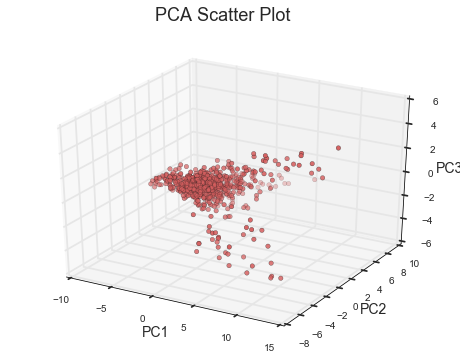

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
sns.set(style='white',palette='muted',color_codes=True)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
fig.suptitle('PCA Scatter Plot', fontsize=18)
ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_zlabel('PC3', fontsize=14)

### Part 6: Additional Analysis
Include any other models you'd like to run here. These can include regressions, classifications, or clusters. 

Run K-Means clustering to figure out how many clusters the data fits in BEFORE doing PCA/scaling

In [60]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(X)

In [61]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [62]:
print(centroids)

[[  7.69038972e-01   2.78401894e+00   1.26893099e+00   3.18939107e+00
    1.31318809e+01   8.94317997e+02   1.25791610e+02   7.81322057e-01
    7.35690122e-01   1.33602706e+01   3.32882273e+00   1.51633018e+01
    8.83857916e+02   1.44265223e+02]
 [  7.40075000e-01   4.00266667e+00   3.20283333e+00   4.54016667e+00
    1.70860000e+01   6.84355000e+03   7.17916667e+02   7.52035000e-01
    6.19401667e-01   2.01865000e+01   8.04916667e+00   2.23570000e+01
    6.41635000e+03   5.43566667e+02]]


In [63]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.79985029206960268

This silhouette score is so high because we have not yet done PCA or scaling.

Run K-Means clustering to figure out how many clusters the data fits in AFTER doing PCA/scaling

In [64]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(xStand)

In [65]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [66]:
print(centroids)

[[-0.6954916   1.16085887  1.64391467  1.18191574  1.12252583  1.63600942
   1.661986   -0.67804519 -1.44227125  1.60957006  1.68155288  1.49090924
   1.65008055  1.47978622]
 [ 0.12291457 -0.20515915 -0.29052984 -0.20888054 -0.19838453 -0.28913274
  -0.29372359  0.11983126  0.2548933  -0.2844601  -0.29718166 -0.26348912
  -0.29161954 -0.26152334]]


In [67]:
metrics.silhouette_score(xStand, labels, metric='euclidean')

0.49617558052982508

In [68]:
airport_pca['cluster'] = pd.Series(clusters.labels_)

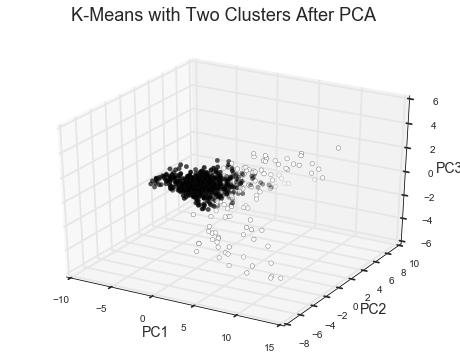

In [69]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, marker='o', c=airport_pca['cluster'])
fig.suptitle('K-Means with Two Clusters After PCA', fontsize=18)
ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_zlabel('PC3', fontsize=14)

Merge Cluster Label onto original dataset before PCA and run multiple classification model with Cluster Label as target variable to determine clustering fit and feature importance

In [ ]:
df = pd.DataFrame(xStand)
df.columns=(u'percent on-time gate arrivals',
          u'average airborne delay', u'average taxi in delay',
          u'average block delay', u'average gate arrival delay', u'Arrival Cancellations', u'Arrival Diversions',
        u'percent on-time gate departures',
         u'percent on-time airport departures', u'average_taxi_out_time',
         u'average taxi out delay', u'average airport departure delay',
         u'Departure Cancellations',u'Departure Diversions')

In [ ]:
df['cluster'] = pd.Series(clusters.labels_)

In [ ]:
df.head()

In [ ]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_clust = df.drop(df.columns[[14]], axis=1)
y = df['cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_clust, y, test_size= 0.3, random_state=42)

In [ ]:
# Run DecisionTreeClassifier Model:
treeclass = DecisionTreeClassifier(random_state=1)
treeclass.fit(X_train, y_train)

In [ ]:
# Predict on test Using DecisionTreeClassifier Model
preds = treeclass.predict(X_test)

In [ ]:
# Create confusion matrix using Test set vs Predicted
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, preds)
cm

In [ ]:
# Print Cross Val Score
cross_val_score(treeclass, x_clust, y, cv=10, n_jobs=-1).mean()

In [ ]:
# Print feature importance
feature_importances = pd.DataFrame(treeclass.feature_importances_,
                                   index = x_clust.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(10)

In [ ]:
# Use RandomForest Models
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf_preds = rf.predict(X_test)

In [ ]:
cm_rf = confusion_matrix(y_test, rf_preds)
cm_rf

In [ ]:
cross_val_score(rf, x_clust, y, cv=10, n_jobs=-1).mean()

In [ ]:
# Print feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_clust.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(10)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

In [ ]:
et.fit(X_train, y_train)

In [ ]:
et_preds = et.predict(X_test)

In [ ]:
cm_et = confusion_matrix(y_test, et_preds)
cm_et

In [ ]:
cross_val_score(et, x_clust, y, cv=10, n_jobs=-1).mean()

In [ ]:
feature_importances = pd.DataFrame(et.feature_importances_,
                                   index = x_clust.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(10)

### Part 7: Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps. Put it on your blog, and include the link here.

Which operational features are most correlated with delays?

What should the airport's next steps be?

### Bonus: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied